# Textová analytika - 4IZ481

Soubor obsahující postupy práce s datasetem, pro doporučení cestovateli hotel.
    - tvorba vizualizaci a tabulek,tvorba korelační matice a kontingenční tabulky, tvorba klasifikátoru sentimentu, celkový sentiment recenzentů

Soubor obsahuje i nepovedené pokusy

###### Načtení datasetu

In [86]:
from pathlib import Path
output_dir = Path("model_categorizer")
if not output_dir.exists():
    output_dir.mkdir()
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Hotel_Reviews.csv")
print ('Number of data points : ', df.shape[0], \
       '\nNumber of features:', df.shape[1])
df.head()

Number of data points :  515738 
Number of features: 17


Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

###### Odstranění duplicitních záznamů

In [87]:
print(sum(df.duplicated()))
df = df.drop_duplicates()
print('After removing Duplicates: {}'.format(df.shape))


526
After removing Duplicates: (515212, 17)


###### Detail o hotelech

In [88]:
df.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

###### Graf zobrazující hotely s největším počtem recenzí

<AxesSubplot:>

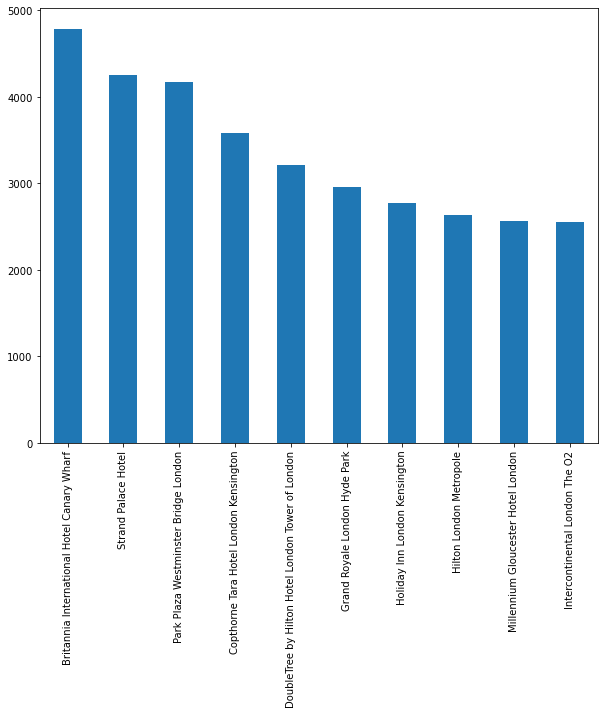

In [89]:
Hotel_Name_count = df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

###### Průměrné hodnocení uživatelů a jejich četnost

<AxesSubplot:xlabel='Average_Score', ylabel='count'>

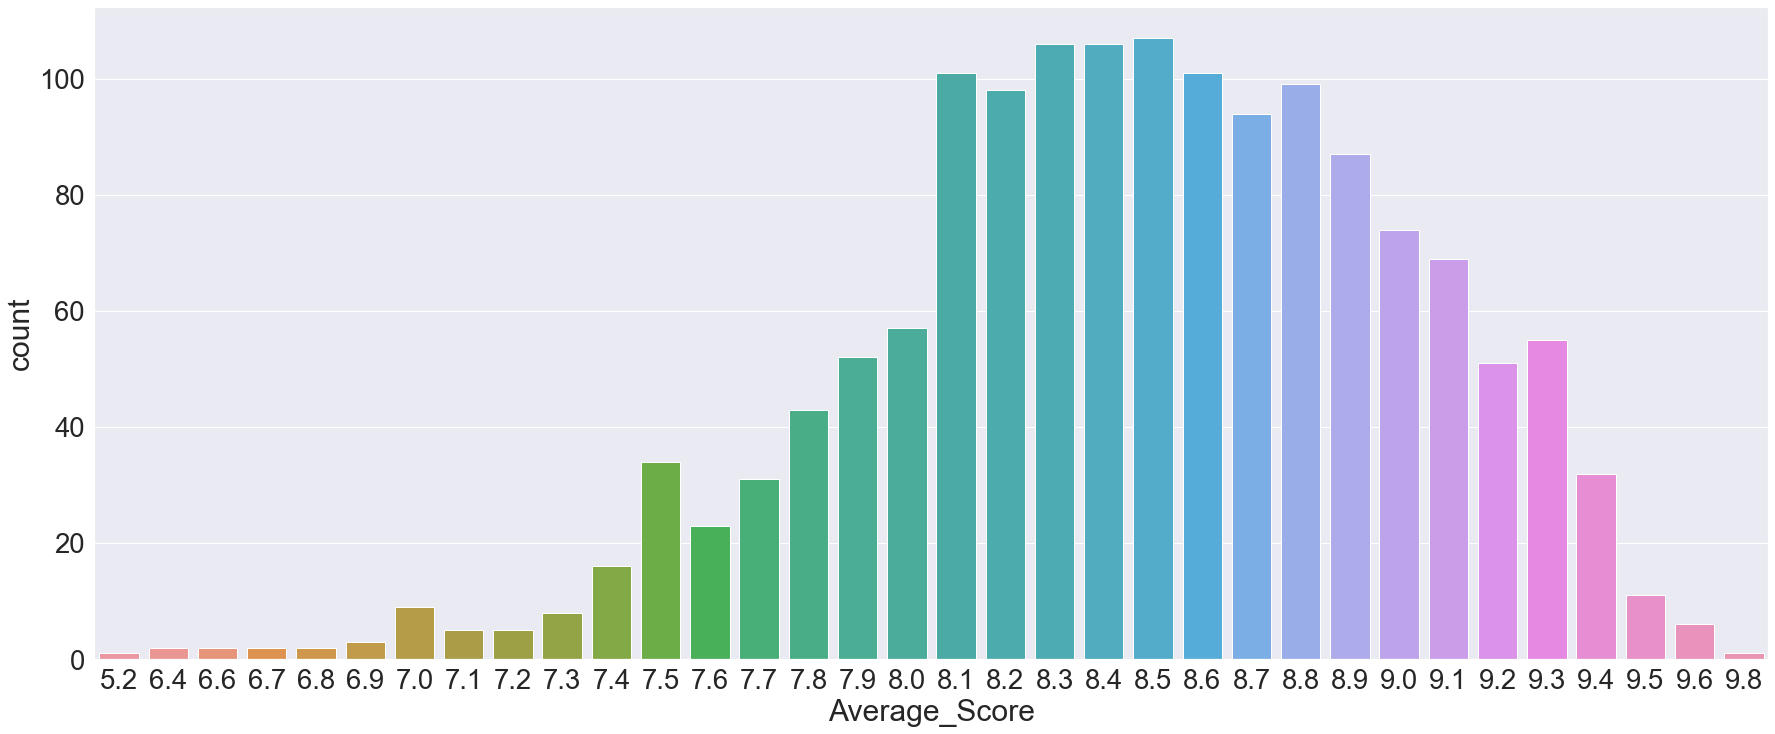

In [90]:
data_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

###### Vytvoření atributu City a úprava názvu města London


In [91]:
#split city
df['City']= df.Hotel_Address.apply(lambda x: x.split(' ')[-2])
df["City"]=df["City"].apply(lambda x: x.replace("United","London"))

###### Zobrazení počtu recenzí pro daná města

In [92]:
df['City'].value_counts().sort_values(ascending=False).head(6)

London       262298
Barcelona     60149
Paris         59413
Amsterdam     57211
Vienna        38937
Milan         37204
Name: City, dtype: int64

###### Zobrazení TOP20 hotelů podle průměrného hodnocení(s omezením na minimálně 1000 recenzí)

In [93]:
df[df.Total_Number_of_Reviews >= 1000][['Hotel_Name','City','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:20]

Hotel_Name       City  \
331922                                 Hotel Palace GL  Barcelona   
14829                   Intercontinental London The O2     London   
372994                            Catalonia Magdalenes  Barcelona   
122627                                 Rosewood London     London   
147504            Shangri La Hotel at The Shard London     London   
406063  Excelsior Hotel Gallia Luxury Collection Hotel      Milan   
433203                          Catalonia Square 4 Sup  Barcelona   
462866                                       The Savoy     London   
324569             Best Western Premier Kaiserhof Wien     Vienna   
282748                             Olivia Balmes Hotel  Barcelona   
465852                        Amba Hotel Charing Cross     London   
231863                                Hotel Cafe Royal     London   
340344                            The Hoxton Amsterdam  Amsterdam   
482085                               UNA Maison Milano      Milan   
340753                                 Ambassade Hotel  Amsterdam   
417387                              The Langham London     London   
468819                                 H10 Cubik 4 Sup  Barcelona   
448418                          Hotel K nig von Ungarn     Vienna   
414395                              Olivia Plaza Hotel  Barcelona   
20546                              The Nadler Victoria     London   

        Average_Score  Total_Number_of_Reviews  
331922            9.4                     1266  
14829             9.4                     4204  
372994            9.4                     1108  
122627            9.4                     1008  
147504            9.4                     2200  
406063            9.4                     1345  
433203            9.4                     1711  
462866            9.4                     1021  
324569            9.4                     1353  
282748            9.3                     1835  
465852            9.3                     1694  
231863            9.3                     1128  
340344            9.3                     1075  
482085            9.3                     1108  
340753            9.3                     1611  
417387            9.3                     1276  
468819            9.3                     1398  
448418            9.3                     1207  
414395            9.3                     2757  
20546             9.3                     1608

###### Zobrazení TOP20 hotelů podle nejvyšší popularity (počet recenzí) s ohledem na minimální průměrné hodnocení 8

In [94]:
df[df.Average_Score >= 8.0][['Hotel_Name','City','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:20]

Hotel_Name       City  \
488409                                     Hotel Da Vinci      Milan   
504027               Park Plaza Westminster Bridge London     London   
496065                             Hotel degli Arcimboldi      Milan   
164259                                Strand Palace Hotel     London   
311000                 Best Western Premier Hotel Couture  Amsterdam   
509232                   The Student Hotel Amsterdam City  Amsterdam   
379680                        Golden Tulip Amsterdam West  Amsterdam   
236055  DoubleTree by Hilton Hotel London Tower of London     London   
404728                                        Glam Milano      Milan   
309843                                      Jaz Amsterdam  Amsterdam   
440985             Copthorne Tara Hotel London Kensington     London   
127024                        Park Grand Paddington Court     London   
140872                                Blakemore Hyde Park     London   
378521                              Leonardo Hotel Vienna     Vienna   
5257                        Park Plaza County Hall London     London   
459453                     Ramada Apollo Amsterdam Centre  Amsterdam   
183024                  St James Court A Taj Hotel London     London   
485248                         Starhotels Business Palace      Milan   
338980                   WestCord Fashion Hotel Amsterdam  Amsterdam   
446580                               Hotel de France Wien     Vienna   

        Average_Score  Total_Number_of_Reviews  
488409            8.1                    16670  
504027            8.7                    12158  
496065            8.3                    10842  
164259            8.1                     9568  
311000            8.7                     8177  
509232            8.7                     7656  
379680            8.5                     7586  
236055            8.7                     7491  
404728            8.8                     7371  
309843            8.9                     7108  
440985            8.1                     7105  
127024            8.1                     6608  
140872            8.5                     6596  
378521            8.1                     6373  
5257              8.4                     6117  
459453            8.2                     5770  
183024            8.7                     5394  
485248            8.1                     5265  
338980            8.7                     5236  
446580            8.5                     5177

#### Zobrazení TOP10 hotelů v každé destinaci s ohledem na minimální počet recenzí 1000

###### Amsterdam

In [95]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'Amsterdam')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
340344                     The Hoxton Amsterdam            9.3   
340753                          Ambassade Hotel            9.3   
324016                     Hotel V Fizeaustraat            9.1   
384025                         Hotel V Nesplein            9.1   
450210                           Hotel Esther a            9.1   
418909                       art otel Amsterdam            9.0   
326208             Crowne Plaza Amsterdam South            9.0   
309843                            Jaz Amsterdam            8.9   
272833                        Element Amsterdam            8.9   
386209  INK Hotel Amsterdam MGallery by Sofitel            8.9   

        Total_Number_of_Reviews  
340344                     1075  
340753                     1611  
324016                     1708  
384025                     1650  
450210                     4687  
418909                     3158  
326208                     1349  
309843                     7108  
272833                     1369  
386209                     2574

###### Paříž

In [96]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'Paris')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
49157               Hotel Op ra Richepanse            9.2   
255024                 La Clef Tour Eiffel            9.0   
88755                         H tel Regina            9.0   
203460                       Le Cinq Codet            9.0   
55386                      COQ Hotel Paris            9.0   
157274  Best Western Premier Kapital Op ra            8.9   
159493       Hotel Saint Petersbourg Opera            8.9   
117226       H tel Aiglon Esprit de France            8.9   
12352                         Select Hotel            8.9   
220440                     Newhotel Roblin            8.8   

        Total_Number_of_Reviews  
49157                      1073  
255024                     1258  
88755                      1329  
203460                     1055  
55386                      1682  
157274                     1444  
159493                     2412  
117226                     1152  
12352                      1145  
220440                     1327

###### Milan

In [97]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'Milan')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
406063  Excelsior Hotel Gallia Luxury Collection Hotel            9.4   
449597                                Room Mate Giulia            9.3   
482085                               UNA Maison Milano            9.3   
483570                                     Hotel Berna            9.2   
404270                        Hotel Principe Di Savoia            9.1   
303186                 Ch teau Monfort Relais Ch teaux            9.0   
494173                       Bianca Maria Palace Hotel            9.0   
470003                         The Square Milano Duomo            9.0   
488052                             Senato Hotel Milano            9.0   
493580                                 Starhotels Echo            8.9   

        Total_Number_of_Reviews  
406063                     1345  
449597                     2011  
482085                     1108  
483570                     4017  
404270                     1543  
303186                     1053  
494173                     2770  
470003                     4192  
488052                     1031  
493580                     3774

###### Vídeň

In [98]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'Vienna')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
324569  Best Western Premier Kaiserhof Wien            9.4   
366395            Hotel Rathaus Wein Design            9.3   
448418               Hotel K nig von Ungarn            9.3   
338713                  The Harmonie Vienna            9.2   
502028             Hotel Kaiserin Elisabeth            9.2   
448911                     Hotel Capricorno            9.1   
464405                       Hotel Stefanie            9.1   
396186                    Hotel Am Parkring            9.0   
353024                     Grand Hotel Wien            9.0   
418203           Sofitel Vienna Stephansdom            9.0   

        Total_Number_of_Reviews  
324569                     1353  
366395                     1120  
448418                     1207  
338713                     1083  
502028                     1772  
448911                     2279  
464405                     3883  
396186                     2304  
353024                     1375  
418203                     1148

###### Barcelona

In [99]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'Barcelona')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
433203             Catalonia Square 4 Sup            9.4   
331922                    Hotel Palace GL            9.4   
372994               Catalonia Magdalenes            9.4   
468819                    H10 Cubik 4 Sup            9.3   
414395                 Olivia Plaza Hotel            9.3   
282748                Olivia Balmes Hotel            9.3   
272345                 Catalonia Catedral            9.2   
399732                     Sixtytwo Hotel            9.2   
331422  Catalonia Passeig de Gr cia 4 Sup            9.2   
360029                         Hotel 1898            9.2   

        Total_Number_of_Reviews  
433203                     1711  
331922                     1266  
372994                     1108  
468819                     1398  
414395                     2757  
282748                     1835  
272345                     1914  
399732                     1010  
331422                     2116  
360029                     1436

###### Londýn

In [100]:
df[(df.Total_Number_of_Reviews >= 1000.0) &(df.City == 'London')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
147504  Shangri La Hotel at The Shard London            9.4   
14829         Intercontinental London The O2            9.4   
122627                       Rosewood London            9.4   
462866                             The Savoy            9.4   
85479                 Hilton London Bankside            9.3   
20546                    The Nadler Victoria            9.3   
417387                    The Langham London            9.3   
231863                      Hotel Cafe Royal            9.3   
465852              Amba Hotel Charing Cross            9.3   
971                  Apex Temple Court Hotel            9.2   

        Total_Number_of_Reviews  
147504                     2200  
14829                      4204  
122627                     1008  
462866                     1021  
85479                      2319  
20546                      1608  
417387                     1276  
231863                     1128  
465852                     1694  
971                        2619

###### Pokus o rozdělení recenzentů podle typu zájezdu, aby bylo možno doporučovat hotely pro single/partnery/ více členné skupiny

In [101]:
df['TypeOfFamily']= df.Tags.apply(lambda x: x.split(',')[0])
df['TypeOfFamily']=df.TypeOfFamily.apply(lambda x: x.split('[')[1])
df['TypeOfFamily']=df.TypeOfFamily.apply(lambda x: x.split("'")[1])
df['TypeOfFamily'].value_counts().sort_values(ascending=False).head(10)

 Leisure trip                   416249
 Business trip                   82662
 Couple                           5804
 Solo traveler                    4282
 Family with young children       2224
 Group                            1600
 With a pet                       1405
 Family with older children        930
 Travelers with friends             56
Name: TypeOfFamily, dtype: int64

# Klasifikator sentimetu

#### vytvoření složky pro model

In [102]:
from pathlib import Path
output_dir=Path("model_categorizer")
if not output_dir.exists():
    output_dir.mkdir()

import

In [103]:
import pandas as pd
import spacy

#### znovu načtení datového ramce pro tvorbu klasifikatora sentimentu

In [104]:
df = pd.read_csv("Hotel_Reviews.csv",
                index_col=False)
df

Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   
3                                194   7/31/2017            7.7   
4                                194   7/24/2017            7.7   
...                              ...         ...            ...   
515733                           168   8/30/2015            8.1   
515734                           168   8/22/2015            8.1   
515735                           168   8/19/2015            8.1   
515736                           168   8/17/2015            8.1   
515737                           168    8/9/2015            8.1   

                   Hotel_Name Reviewer_Nationality  \
0                 Hotel Arena              Russia    
1                 Hotel Arena             Ireland    
2                 Hotel Arena           Australia    
3                 Hotel Arena      United Kingdom    
4                 Hotel Arena         New Zealand    
...                       ...                  ...   
515733  Atlantis Hotel Vienna              Kuwait    
515734  Atlantis Hotel Vienna             Estonia    
515735  Atlantis Hotel Vienna               Egypt    
515736  Atlantis Hotel Vienna              Mexico    
515737  Atlantis Hotel Vienna             Hungary    

                                          Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                        No Negative   
515737       I was in 3rd floor It didn t work Free Wife    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     397                     1403   
1                                       0                     1403   
2                                      42                     1403   
3                                     210                     1403   
4                                     140                     1403   
...                                   ...                      ...   
515733                                 14                     2823   
515734                                 11                     2823   
515735                                 19                     2823   
515736                                  0                     2823   
515737                                 13                     2823   

                                          Positive_Review  \
0        Only the park outside of the hotel was beauti...   
1        No real complaints the hotel was great great ...   
2        Location was good and staff were ok It is cut...   
3        Great location in nice surroun

#### sjednocení review textu a přejmenování pro lepší práci

In [105]:
df["review"] = df["Negative_Review"]+df["Positive_Review"]
df= df.rename(columns={'Reviewer_Score': 'score'})
df

Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   
3                                194   7/31/2017            7.7   
4                                194   7/24/2017            7.7   
...                              ...         ...            ...   
515733                           168   8/30/2015            8.1   
515734                           168   8/22/2015            8.1   
515735                           168   8/19/2015            8.1   
515736                           168   8/17/2015            8.1   
515737                           168    8/9/2015            8.1   

                   Hotel_Name Reviewer_Nationality  \
0                 Hotel Arena              Russia    
1                 Hotel Arena             Ireland    
2                 Hotel Arena           Australia    
3                 Hotel Arena      United Kingdom    
4                 Hotel Arena         New Zealand    
...                       ...                  ...   
515733  Atlantis Hotel Vienna              Kuwait    
515734  Atlantis Hotel Vienna             Estonia    
515735  Atlantis Hotel Vienna               Egypt    
515736  Atlantis Hotel Vienna              Mexico    
515737  Atlantis Hotel Vienna             Hungary    

                                          Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                        No Negative   
515737       I was in 3rd floor It didn t work Free Wife    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     397                     1403   
1                                       0                     1403   
2                                      42                     1403   
3                                     210                     1403   
4                                     140                     1403   
...                                   ...                      ...   
515733                                 14                     2823   
515734                                 11                     2823   
515735                                 19                     2823   
515736                                  0                     2823   
515737                                 13                     2823   

                                          Positive_Review  \
0        Only the park outside of the hotel was beauti...   
1        No real complaints the hotel was great great ...   
2        Location was good and staff were ok It is cut...   
3        Great location in nice surroun

#### Převedení na širší kategorie, kde negativní je <5 a pozitivné >5

###### Počet negativních a počet pozitivních recenzí

review   score
sentiment                
NEGATIVE    52507   52507
POSITIVE   463231  463231

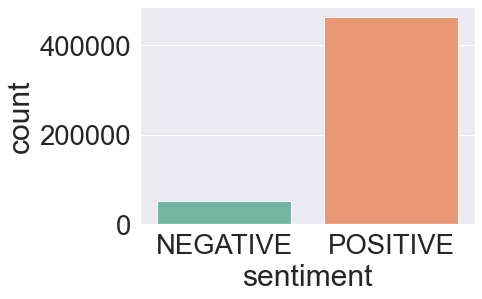

In [106]:
df["sentiment"] = pd.cut(df["score"],
                        bins=[0,5.99,10],
                        labels=["NEGATIVE","POSITIVE"])
sns.countplot(x="sentiment",data=df,palette="Set2")
tab = df[["review","score", "sentiment"]]
tab.groupby("sentiment").count()

##### Počet pozitivních/negativních recenzí u nejvíce hodnocených hotelů

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Britannia International Hotel Canary Wharf'),
  Text(1, 0, 'Strand Palace Hotel'),
  Text(2, 0, 'Park Plaza Westminster Bridge London'),
  Text(3, 0, 'Copthorne Tara Hotel London Kensington'),
  Text(4, 0, 'DoubleTree by Hilton Hotel London Tower of London')])

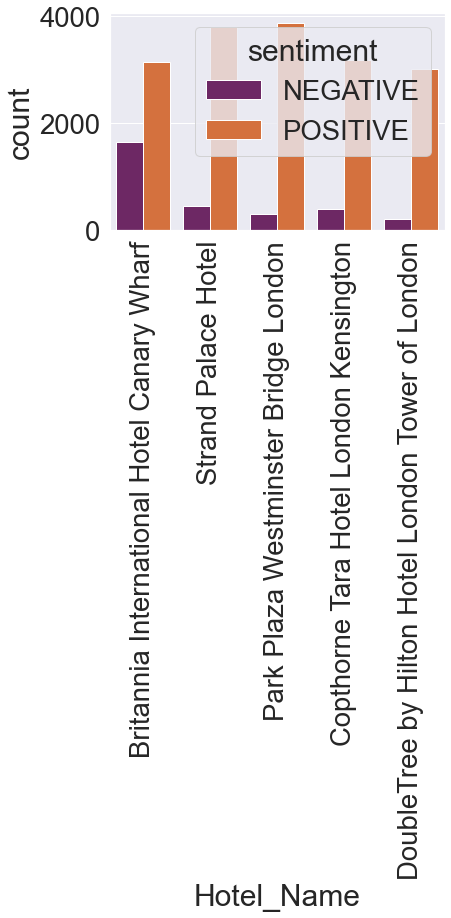

In [107]:
sns.countplot(x="Hotel_Name", hue="sentiment", data=df, palette="inferno",
             order=df.Hotel_Name.value_counts().iloc[:5].index)
import matplotlib.pylab as plt
plt.xticks(rotation=90)

#### Vyvážení dat

In [108]:
df_neg = df[df.sentiment=="NEGATIVE"]
df_pos = df[df.sentiment=="POSITIVE"]

In [109]:
df_pos = df_pos.sample(500)
df_neg = df_neg.sample(500)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

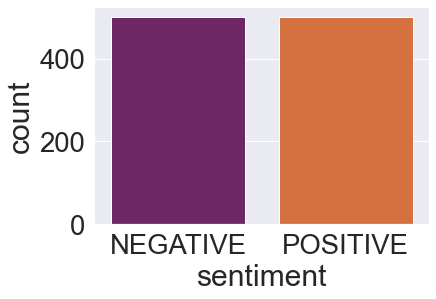

In [110]:
df = pd.concat([df_neg,df_pos], ignore_index=True)
sns.countplot(x="sentiment", data=df, palette="inferno")

#### Příprava pro trening

In [111]:
df["cats"] = [{"POSITIVE": y=="POSITIVE", "NEGATIVE": y=="NEGATIVE"} for y in df.sentiment]
df

Hotel_Address  \
0            14 Rue Beaujon 8th arr 75008 Paris France   
1    50 Lancaster Gate Westminster Borough London W...   
2    Rembrandtplein 44 Amsterdam City Center 1017 C...   
3    11 13 Bayley Street Bedford Square Camden Lond...   
4    75 Gower Street Camden London WC1E 6HJ United ...   
..                                                 ...   
995  Peters Lane Cowcross Street Islington London E...   
996  Dorotheergasse 3 01 Innere Stadt 1010 Vienna A...   
997  84 King Street Hammersmith and Fulham London W...   
998  Empire Way Wembley Brent London HA9 8DS United...   
999  7 Gracechurch Street City of London London EC3...   

     Additional_Number_of_Scoring Review_Date  Average_Score  \
0                             143    3/7/2016            8.8   
1                             417   9/14/2015            6.7   
2                              76    6/6/2017            7.4   
3                             253   5/22/2017            8.1   
4                             369  12/12/2015            6.4   
..                            ...         ...            ...   
995                           146   6/12/2016            9.1   
996                            66   3/11/2016            8.6   
997                           390   6/16/2016            7.8   
998                          1005  12/22/2016            8.3   
999                           764   9/20/2015            8.2   

                                        Hotel_Name Reviewer_Nationality  \
0                    Sofitel Paris Arc De Triomphe      United Kingdom    
1                                  Commodore Hotel      United Kingdom    
2                            Royal Amsterdam Hotel      United Kingdom    
3                                    My Bloomsbury      United Kingdom    
4                                  Hotel Cavendish             Ireland    
..                                             ...                  ...   
995                                    The Rookery      United Kingdom    
996                                   Graben Hotel           Australia    
997  Best Western Plus Seraphine Hammersmith Hotel        Saudi Arabia    
998                     Holiday Inn London Wembley      United Kingdom    
999                Club Quarters Hotel Gracechurch      United Kingdom    

                                       Negative_Review  \
0                     Portion size of meals too small    
1     The twin room was very small and tired lookin...   
2     The room was terribly small I m not usually o...   
3                                          No Negative   
4     Very dated musty smell in room too many stair...   
..                                                 ...   
995   Room was on the third floor which was difficu...   
996   The only addition I would make to the room is...   
997   Breakfast was okay but could have offered mor...   
998   The sofa bed for our children was not that co...   
999                                        No Negative   

     Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                    8                      825   
1                                   71                     2400   
2                                  126                      627   
3                                    0                     1161   
4                                   20                     2275   
..                                 ...                      ...   
995                                 27                      501   
996                                 27                      657   
997                                 17                     1717   
998                                 12                     3469   
999                                  0                     2996   

                                       Positive_Review  \
0     Comfortable bed nice location very friendly a...   
1     Good location as next to Hyde Kensington park...  

#### Dělení trenovací a testovacích dat

In [112]:
df = df.sample(frac=1) #promíchání dat

In [113]:
split=0.8
split_row=int(len(df) * split)

In [114]:
df_test = df[split_row:] #200 testovacích dat
df_train = df[:split_row] #800 tranovacích

### vytváření klasifikátoru

In [115]:
train_data = list(zip(df_train["review"], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test["review"], [{"cats": cats} for cats in df_test["cats"]]))

#### Načtení modelu

In [116]:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()

In [117]:
textcat = nlp.create_pipe("textcat",
                        config={"exclusive_classes": True,
                               "architecture":"simple_cnn"})

In [118]:
nlp.add_pipe(textcat, last=True)

In [119]:
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")
textcat.labels

('POSITIVE', 'NEGATIVE')

##### Příprava pro trenink

In [120]:
from spacy.util import minibatch, compounding

In [121]:
batch_sizes = compounding(1.0,32.0,1.5)
for x in range(12): print(next(batch_sizes))

1.0
1.5
2.25
3.375
5.0625
7.59375
11.390625
17.0859375
25.62890625
32.0
32.0
32.0


In [122]:
batch_sizes = compounding(1.0,4.0,1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' At breakfast food was not replaced I Asked for bacon after 20 mins No Bacon requested the manager who said sorry did nothing after 15 mins Still no bacon complain to acting manager who threatened to evict me and call police for threatening him My wife I are 80yrs of age we were Celebrating her birthday at no time did I threaten him We left dining room without breakfast the other guest all said they were disappointed And told the acting manager so He ignored all protestations No Positive', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 1 [(' Rooms are quite small We could hear noises TV phone ringing form the room next to us Locations is great all major tourists sights are in walking distance great availability of underground and bus Breakfast was very delicious The best thing is the smartphone in the room with internet and free calls you can take with you to the city You can leave bags and luggage after checkout and pick it up later for free', {'cats': {'POSITI

#### Trenink

In [123]:
n_iter = 50
dropout = 0.7

In [124]:
pipe_exceptions = ["textcat"] #odebrání ostatnich pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

#### evaluace modelu

In [125]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

###### ROC křivka

In [126]:
y = df_test["sentiment"]
random_scores = np.random.rand(len(df_test.sentiment))
fpr, tpr, thresholds = metrics.roc_curve(y, random_scores, pos_label="POSITIVE")

##### AUC skore

In [127]:
metrics.auc(fpr, tpr)

0.5041838895049904

[Text(0.5, 0, 'False Positive'), Text(0, 0.5, 'True Positive')]

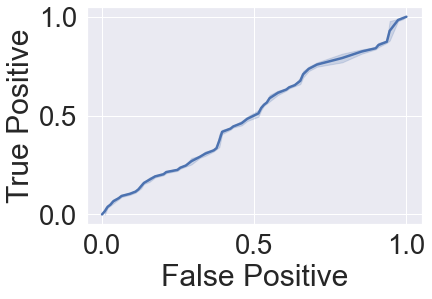

In [128]:
plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
plot.set(xlabel='False Positive', ylabel='True Positive')

In [129]:
import random

In [130]:
score = pd.DataFrame() 
print("trénink", end="") 

with nlp.disable_pipes(other_pipes): 
    
    optimizer = nlp.begin_training() 
    
    for i in range(n_iter): 
        print(".", end="") 
        losses = {}        
        random.shuffle(train_data) 
        
        batch_sizes = compounding(8.0, 40.0, 1.2) 
        batches = minibatch(train_data, size=batch_sizes) 
        
        for batch in batches:  
            texts, annotations = zip(*batch) 
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) 
        
        with textcat.model.use_params(optimizer.averages): 
            scorer = nlp.evaluate(test_data) 
            
          
            score.loc[i, "loss"] = losses["textcat"] 
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
            
            docs_generator = nlp.pipe(df_test["review"]) 
            docs = list(docs_generator) 
            scores = [doc.cats["POSITIVE"] for doc in docs] 
            
            
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                                     y_score = scores, 
                                                     pos_label = "POSITIVE")
            
            
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            
score 

trénink..................................................

loss          F         P+         R+         F+         P-  \
0   0.031538  34.434191  45.595855  96.703297  61.971831  57.142857   
1   0.032195  50.187585  83.333333  16.483516  27.522936  58.241758   
2   0.030721  64.402092  76.000000  41.758242  53.900709  64.666667   
3   0.030243  70.333124  67.021277  69.230769  68.108108  73.584906   
4   0.028621  71.823049  73.076923  62.637363  67.455621  72.131148   
5   0.029513  69.755016  67.032967  67.032967  67.032967  72.477064   
6   0.034380  71.909395  72.500000  63.736264  67.836257  72.500000   
7   0.024675  70.644802  68.965517  65.934066  67.415730  72.566372   
8   0.021761  69.755016  67.032967  67.032967  67.032967  72.477064   
9   0.026939  68.746849  65.934066  65.934066  65.934066  71.559633   
10  0.029269  68.270756  65.217391  65.934066  65.573770  71.296296   
11  0.025587  67.738683  64.835165  64.835165  64.835165  70.642202   
12  0.014970  68.887997  64.948454  69.230769  67.021277  72.815534   
13  0.021802  68.746849  65.934066  65.934066  65.934066  71.559633   
14  0.017759  69.222231  66.666667  65.934066  66.298343  71.818182   
15  0.020497  70.031746  69.047619  63.736264  66.285714  71.551724   
16  0.013337  69.696970  67.415730  65.934066  66.666667  72.072072   
17  0.020653  67.842428  64.210526  67.032967  65.591398  71.428571   
18  0.021830  68.686869  66.292135  64.835165  65.555556  71.171171   
19  0.023758  70.644802  68.965517  65.934066  67.415730  72.566372   
20  0.011517  71.118036  69.767442  65.934066  67.796610  72.807018   
21  0.015463  71.118036  69.767442  65.934066  67.796610  72.807018   
22  0.008425  70.501475  69.879518  63.736264  66.666667  71.794872   
23  0.014330  70.576299  69.411765  64.835165  67.045455  72.173913   
24  0.013068  70.231338  67.777778  67.032967  67.403315  72.727273   
25  0.015172  69.091232  67.441860  63.736264  65.536723  71.052632   
26  0.016868  68.547078  67.058824  62.637363  64.772727  70.434783   
27  0.017020  68.933819  68.292683  61.538462  64.739884  70.338983   
28  0.010068  68.933819  68.292683  61.538462  64.739884  70.338983   
29  0.008975  69.400245  69.135802  61.538462  65.116279  70.588235   
30  0.005976  68.844965  68.750000  60.439560  64.327485  70.000000   
31  0.013846  69.091232  67.441860  63.736264  65.536723  71.052632   
32  0.008402  69.015873  67.857143  62.637363  65.142857  70.689655   
33  0.009899  68.686869  66.292135  64.835165  65.555556  71.171171   
34  0.007321  68.213123  65.555556  64.835165  65.193370  70.909091   
35  0.009949  68.213123  65.555556  64.835165  65.193370  70.909091   
36  0.006856  69.159989  67.045455  64.835165  65.921788  71.428571   
37  0.005471  69.159989  67.045455  64.835165  65.921788  71.428571   
38  0.005545  69.159989  67.045455  64.835165  65.921788  71.428571   
39  0.008842  68.620306  66.666667  63.736264  65.168539  70.796460   
40  0.004685  69.696970  67.415730  65.934066  66.666667  72.072072   
41  0.003220  69.696970  67.415730  65.934066  66.666667  72.072072   
42  0.008111  70.171137  68.181818  65.934066  67.039106  72.321429   
43  0.003679  69.091232  67.441860  63.736264  65.536723  71.052632   
44  0.008225  69.400245  69.135802  61.538462  65.116279  70.588235   
45  0.004960  69.866442  70.000000  61.538462  65.497076  70.833333   
46  0.004797  69.866442  70.000000  61.538462  65.497076  70.833333   
47  0.005047  69.866442  70.000000  61.538462  65.497076  70.833333   
48  0.002706  69.866442  70.000000  61.538462  65.497076  70.833333   
49  0.009611  69.866442  70.000000  61.538462  65.497076  70.833333   

           R-         F-       AUC  
0    3.669725   6.896552  0.655308  
1   97.247706  72.852234  0.727795  
2   88.990826  74.903475  0.743825  
3   71.559633  72.558140  0.759452  
4   80.733945  76.190476  0.764694  
5   72.477064  72.477064  0.763686  
6   79.816514  75.982533  0.769332  
7   75.229358  73.873874  0.768928  
8   72.477064  72.477064  0.768828  
9   71.559633  7

##### ROC pro finální model

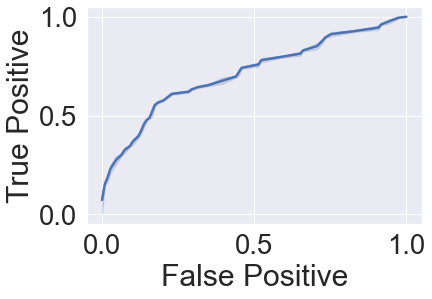

In [131]:
docs_generator = nlp.pipe(df_test["review"]) 
docs = list(docs_generator) 
scores = [doc.cats["POSITIVE"] for doc in docs] 


fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                         y_score = scores, 
                                         pos_label = "POSITIVE")


roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() 

###### uložení modelu

In [132]:
with nlp.use_params(optimizer.averages):
    nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to model_categorizer


## Kontingenční tabulka

###### Kontingenční tabulka vyjadřující průměrné/minimální/maximmální hodnocení pro daný hotel

In [133]:
pd.pivot_table(df,
              values="score",
              aggfunc=["mean","min","max"],
              index="Hotel_Name",
              margins=True)

mean   min   max
                                score score score
Hotel_Name                                       
1K Hotel                       5.8000   5.8   5.8
ADI Hotel Poliziano Fiera      6.3000   6.3   6.3
Acad mie H tel Saint Germain   2.5000   2.5   2.5
Acevi Villarroel               5.0000   4.6   5.4
Acta Atrium Palace            10.0000  10.0  10.0
...                               ...   ...   ...
citizenM Amsterdam            10.0000  10.0  10.0
citizenM London Bankside       7.5000   5.0  10.0
citizenM London Shoreditch     9.2000   9.2   9.2
citizenM Tower of London       7.5000   7.5   7.5
All                            6.7359   2.5  10.0

[555 rows x 3 columns]

###### Rozšíření kontingenční tabulky o kategorie sentimentu - ERROR :(

In [134]:
pd.pivot_table(df,
              values=["score","sentiment"],
              aggfunc={"score":"mean","sentiment":"count"},
              index=["Hotel_Name","sentiment"],
              margins=True)

ValueError: Grouper for 'sentiment' not 1-dimensional

# Korelační matice

Korelace průměrného hodnocení v hotelu v závisloti na počtu hodnocení

In [135]:
corel = df[["Total_Number_of_Reviews","Average_Score"]]
corel.corr()

Total_Number_of_Reviews  Average_Score
Total_Number_of_Reviews                 1.000000      -0.202824
Average_Score                          -0.202824       1.000000

# Analýza Sentimentu rencezentů

In [136]:
from google.cloud import language_v1
from google.oauth2 import service_account

In [137]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [138]:
client = language_v1.LanguageServiceClient(credentials=creds)

Bylo potřeba znovu naimportovat data, jelikož při pří tvorbě klasifikátoru došlo k jejich vyvážení

In [145]:
df = pd.read_csv("Hotel_Reviews.csv",
                index_col=False)
df["review"] = df["Negative_Review"]+df["Positive_Review"]

###### Sjednocení review pro analýzu

In [146]:
text_content = df["review"].values[0]

In [147]:
type(text_content) #kontrola zda se jedná o string

str

In [150]:
def analyze_sentiment(text_content):
    type_ = language_v1.Document.Type.PLAIN_TEXT
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}
    encoding_type = language_v1.EncodingType.UTF8
    response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    return(response)

In [151]:
response = analyze_sentiment(text_content)

In [152]:
print(u"Score dokumentu: {}".format(response.document_sentiment.score))
print(u"Magnitude dokumentu: {}".format(response.document_sentiment.magnitude))

Score dokumentu: -0.6000000238418579
Magnitude dokumentu: 1.2999999523162842
